<a href="https://colab.research.google.com/github/WinnieAnyoso/Football_prediction/blob/master/Moringa_Data_Science_Core_W6_Independent_Project_2020_07_Winnie_Anyoso_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

* Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

* Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

 
Context

A more detailed explanation and history of the rankings is available here: [Link (Links to an external site.)] 

An explanation of the ranking procedure is available here: [Link (Links to an external site.)]

Dataset Columns

Some features are available on the FIFA ranking page [Link (Links to an external site.)].

Rank
Country Abbreviation
Total Points
Previous Points
Rank Change
Average Previous Years Points
Average Previous Years Points Weighted (50%)
Average 2 Years Ago Points
Average 2 Years Ago Points Weighted (30%)
Average 3 Years Ago Points
Average 3 Years Ago Points Weighted (20%)
Confederation
Date - date of the match
Home_team - the name of the home team
Away_team - the name of the away team
Home_score - full-time home team score including extra time, not including penalty-shootouts
Away_score - full-time away team score including extra time, not including penalty-shootouts
Tournament - the name of the tournament
City - the name of the city/town/administrative unit where the match was played
Country - the name of the country where the match was played
Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
Assessment Expectation

In order to work on the above problem, you need to do the following:

Define the question, the metric for success, the context, experimental design taken and the appropriateness of the available data to answer the given question
Expected flow for the assessment:
Perform your EDA
Perform any necessary feature engineering 
Check of multicollinearity
Start building the model
Cross-validate the model
Compute RMSE
Create residual plots for your models, and assess their heteroscedasticity using Bartlett’s test
Perform appropriate regressions on the data including your justification
Challenge your solution by providing insights on how you can make improvements.
Dataset

The dataset and glossary to use for this project can be found here. [Link (Links to an external site.)] 



---
## 1. Importing necessary libraries 


In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.model_selection 

## 2. Loading datasets


In [456]:
# fifa dataset
fifa = pd.read_csv('fifa_ranking.csv')
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [457]:
#result dataset
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


# 3. Data exploration

In [458]:
# shapes of the data frames

print("fifa shape is: " + str(fifa.shape))
print('results shape is: '+ str(results.shape))

fifa shape is: (57793, 16)
results shape is: (40839, 9)


In [459]:
# statistical summaries for the fifa table
(fifa.describe())


,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [460]:
# Statistical summaries for the results table.
results.describe()

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [461]:
print("fifa datatypes are: \n\n" + str(fifa.dtypes))

print('results datatypes are: \n\n: '+ str(results.dtypes))

fifa datatypes are: 

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object
results datatypes are: 

: date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


In [462]:
print("fifa info are: \n\n" + str(fifa.info))

print('results info are: \n\n: '+ str(results.info))

fifa info are: 

<bound method DataFrame.info of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>
results info are: 

: <bound method DataFrame.info of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07

In [463]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [464]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

## 4. Tidying up the datasets


In [465]:
# checking for anomalies 
# duplicates
print(str(fifa.duplicated().any()))
print('There are '+str(fifa.duplicated().sum())+ ' duplicated records')

True
There are 37 duplicated records


* There are 37 duplicated rescords in the fifa dataset


In [466]:
print(results.duplicated().any())
print('There are '+str(results.duplicated().sum())+ ' duplicated records')

False
There are 0 duplicated records


* There are no duplicated rescords in the results dataset

In [467]:
# dropping duplicated records in the fifa dataset
fifa = fifa.drop_duplicates(keep = 'first')

fifa.duplicated().any() #checking whether duplicated records have been dropped 


False

In [468]:
# missing values 

# fifa dataset
print('Null Values in Fifa Dataset: \n', fifa.isnull().sum())

# results dataset
print('Null Values in Results Dataset: \n', results.isnull().sum())

Null Values in Fifa Dataset: 
 rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64
Null Values in Results Dataset: 
 date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64


* There are no null values in the either of the datasets
9

In [469]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [470]:
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

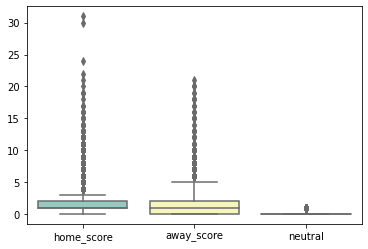

In [471]:
# checking for outliers 
# here we will check for outliers using box plots. only numerical columns are considered i.e using box plots
# this implies that we have plot boxplots for columns except for those with object datatypes
ax = sns.boxplot(data=results, orient="v", palette="Set3")

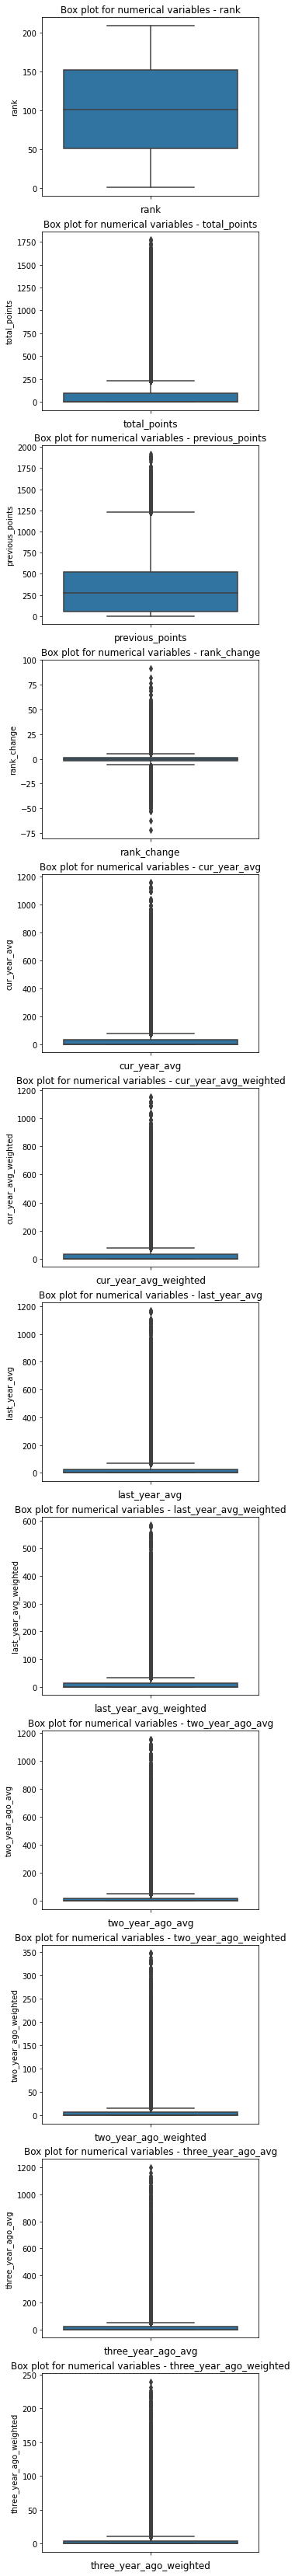

In [472]:
#fifa.boxplot(showmeans=True)
numerical_col_fifa= ['rank', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted']
numerical_col_fifa


fig, ax = plt.subplots(len(numerical_col_fifa), figsize=(5,60))

for i, col_val in enumerate(numerical_col_fifa):

    sns.boxplot(y=fifa[col_val], ax=ax[i])
    ax[i].set_title('Box plot for numerical variables - {}'.format(col_val), fontsize=12)
    ax[i].set_xlabel(col_val, fontsize=12)

plt.show()

In [473]:
# since fifa rankings were introduced in December 1992 we will consider results and  
# fifa rankings from 1993. 
# first we converting data types for date to datetime to make it easy to work with years
fifa.rank_date = pd.to_datetime(fifa.rank_date)
results.date = pd.to_datetime(results.date)

In [474]:
# year columns
fifa['year'] = fifa.rank_date.dt.year
results['year'] = results.date.dt.year

# month columns
fifa['month'] = fifa.rank_date.dt.month
results['month'] = results.date.dt.month

In [475]:
# the fifa table has rankings from 1993
# result tables has data from the 19th century. we consider only records from 1993 from the results
# table too.
# we rename the new dataframe as results1 
results1 = results[results['year'] >= 1993]
results1.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,1
17362,1993-01-02,Gabon,Burkina Faso,1,1,Friendly,Libreville,Gabon,False,1993,1


In [476]:
results1.shape

(23478, 11)

Now dealing with columns, 


In [477]:
# dropping all the unncesary columns from the 2 dataframes 
#fifa.columns
fifa1 =fifa.drop(columns=['country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'])
fifa1.head(2)


,rank,country_full,confederation,rank_date,year,month
0,1,Germany,UEFA,1993-08-08,1993,8
1,2,Italy,UEFA,1993-08-08,1993,8


In [478]:
# results1.columns
results2 =results1.drop(columns=['city', 'country'])

results.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3


* City and country where the tournament was played are not important to make predictions

In [479]:
# Merging the data sets

# NB: both away and home teams had diffrent ranks over the years, so we should merge the two 
# datasets based on the
# away and home ranks, and then merge them to one dataframe # gosh anisa,stop overthinking
# team names in the results table are the same as the country name in the fifa tables. 
# home team/away team(country), year and month should be the same in both tables, so we merge on this columns 

away = pd.merge(results2, fifa1, left_on = ['away_team','year', 'month'], 
                right_on = ['country_full','year', 'month'])

# renaming the rank column from rank to away_rank
away  = away.rename(columns={'rank': 'away_rank'})
away.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08
1,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08


In [480]:
home = pd.merge(results2, fifa1,  left_on = ['home_team', 'year', 'month'], 
                right_on = ['country_full', 'year', 'month'] )
# renaming the rank to home_rank 
home = home.rename(columns={'rank': 'home_rank'})
home.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,home_rank,country_full,confederation,rank_date
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-15,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993,8,19,Colombia,CONMEBOL,1993-08-08


In [481]:
# combining the two dataframes away and home, 

#final_fifa =home.append(away, ignore_index=True) # gave us null values.
final_fifa = pd.merge(away,home, how= 'inner', left_on = ['year', 'month', 'away_team'], 
                      right_on = ['year', 'month', 'away_team']) 

final_fifa.head(5)

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,away_rank,country_full_x,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,neutral_y,home_rank,country_full_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,1993-08-15,Colombia,2,1,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08


* From above, it is clear to see that there are duplicates. each record seems to have been duplicated

In [482]:
#final_fifa.drop_duplicates(keep = 'first', inplace = True)
#final_fifa.head(10)
final_fifa1 = final_fifa.drop_duplicates(keep=False)
final_fifa1

,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,away_rank,country_full_x,confederation_x,rank_date_x,date_y,home_team_y,home_score_y,away_score_y,tournament_y,neutral_y,home_rank,country_full_y,confederation_y,rank_date_y
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-01,Colombia,0,0,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,1993-08-29,Argentina,0,0,FIFA World Cup qualification,False,5,Argentina,CONMEBOL,1993-08-08
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,1993-08-15,Colombia,2,1,FIFA World Cup qualification,False,19,Colombia,CONMEBOL,1993-08-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,2018-06-26,Nigeria,1,2,FIFA World Cup,True,48,Nigeria,CAF,2018-06-07
28435,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,2018-06-30,France,4,3,FIFA World Cup,True,7,France,UEFA,2018-06-07
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,2018-06-26,Nigeria,1,2,FIFA World Cup,True,48,Nigeria,CAF,2018-06-07
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,2018-06-28,Japan,0,1,FIFA World Cup,True,61,Japan,AFC,2018-06-07


In [483]:
# dropping redundant columns
final_fifa2.columns
final_fifa2 =final_fifa.drop(columns=['date_y','home_team_y', 'home_score_y', 'away_score_y', 'tournament_y',
                         'neutral_y', 'country_full_y', 'confederation_y','rank_date_y'])
final_fifa2.head(2)


,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,neutral_x,year,month,away_rank,country_full_x,confederation_x,rank_date_x,home_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5


In [484]:
# renaming columns 
#home = home.rename(columns={'rank': 'home_rank'})
final_fifa3 = final_fifa2.rename(columns={'date_x': 'date','home_team_x':'home_team', 'home_score_x': 'home_score', 'away_score_x': 'away_score', 'tournament_x': 'tournament',
                         'neutral_x': 'neutral', 'country_full_x': 'country_full', 'confederation_x': 'confederation','rank_date_x': 'rank_date'})
final_fifa3.head(2)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5


In [485]:
# now adding a column for total goals scored



final_fifa3['Total_goals'] = final_fifa3.home_score + final_fifa3.away_score
final_fifa3

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,3
28435,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,7,7
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,7
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,61,1


* Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

In [492]:
# now, we create a result deviation column , 
# negative deviation should imply a loss for the home team, positive deviation should 
# imply a win, any other should imply a loss
final_fifa3['Results_deviation'] = final_fifa3['home_score'] - final_fifa3['away_score']
final_fifa3.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals,Results_deviation
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,7,1
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,61,1,-1
28438,2018-06-28,England,Belgium,0,1,FIFA World Cup,True,2018,6,3,Belgium,UEFA,2018-06-07,12,1,-1


In [493]:
def result(Results_deviation):
  if Results_deviation > 0:
    return 'Win'
  elif Results_deviation < 0:
    return 'Loss'
  else:
    return 'Draw'

  result(Results_deviation)

In [504]:
### Use .apply to save the new column if we'd like
#rectangles_df['area'] = rectangles_df.apply(calculate_area, axis=1)
# rectangles_df
final_fifa3['Result'] = final_fifa3.Results_deviation.apply(lambda x: result(x))
final_fifa3

,date,home_team,away_team,home_score,away_score,tournament,neutral,year,month,away_rank,country_full,confederation,rank_date,home_rank,Total_goals,Results_deviation,Result
0,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0,0,Draw
1,1993-08-01,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0,0,Draw
2,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,19,0,0,Draw
3,1993-08-29,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993,8,67,Paraguay,CONMEBOL,1993-08-08,5,0,0,Draw
4,1993-08-01,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993,8,5,Argentina,CONMEBOL,1993-08-08,19,1,-1,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28434,2018-06-26,Nigeria,Argentina,1,2,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,3,-1,Loss
28435,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,7,7,1,Win
28436,2018-06-30,France,Argentina,4,3,FIFA World Cup,True,2018,6,5,Argentina,CONMEBOL,2018-06-07,48,7,1,Win
28437,2018-06-28,Japan,Poland,0,1,FIFA World Cup,True,2018,6,8,Poland,UEFA,2018-06-07,61,1,-1,Loss


## EDA
### Univariate analysis 

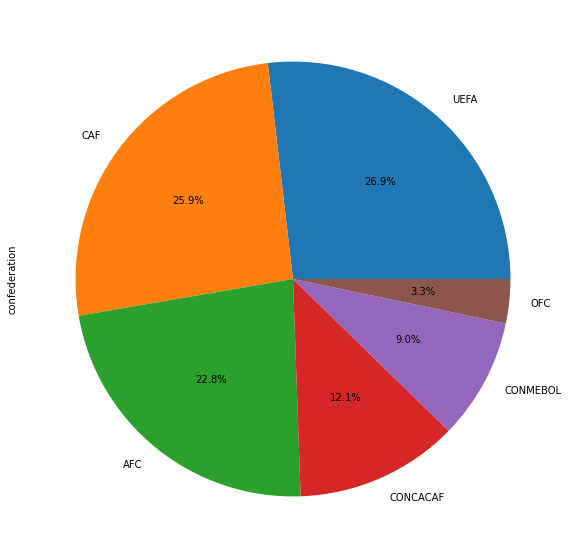

In [507]:
final_fifa3['confederation'].value_counts().plot(kind='pie', figsize=(18, 10), autopct='%1.1f%%')

* Most of the teams are from UEFA, CAF and AFC confederations.

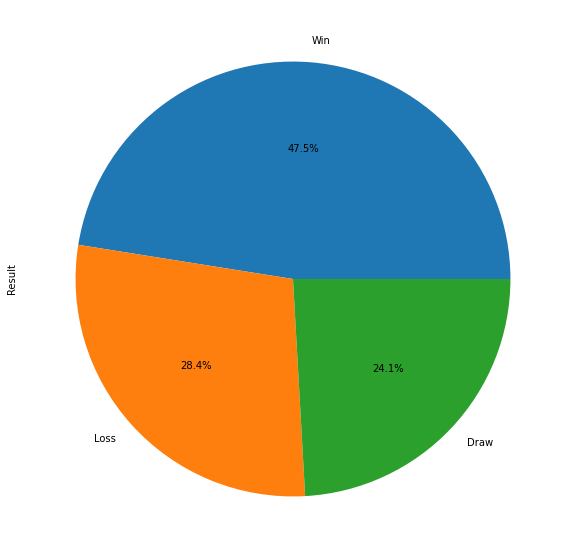

In [508]:
# pie chart for the wins Loses and draws. 
final_fifa3['Result'].value_counts().plot(kind='pie', figsize=(18, 10), autopct='%1.1f%%')

* There have been more wins than losses  and draws from 1993-2019

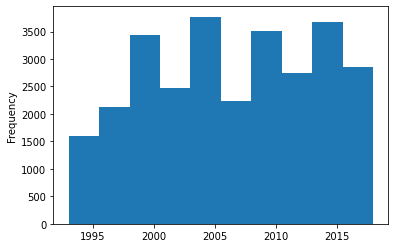

In [509]:
final_fifa3['year'].plot.hist(stacked = True)

* The hist shows a trend in the data  i.e  around after every four years there's an increase in the number of matches played. 

Bivarate Analysis